# <div align="center" style="color: #ff5733;">Data For Anti-Fraud</div>

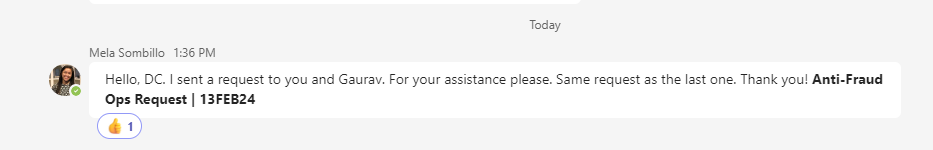

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
dfr = pd.read_excel(r"D:\OneDrive - Tonik Financial Pte Ltd\MyStuff\Mela Sombillo csombillo1@tonikbank.com\Anti-Fraud Ops Request  13FEB24\Anti-Fraud Ops Request l 13FEB24.xlsx", sheet_name='rawdata')
print(f"The rows and columns in dfr are:\t {dfr.shape}")

The rows and columns in dfr are:	 (873, 24)


In [3]:
pd.set_option("Display.max_columns", None)
dfr.head()

,customerId,Source,loanAccountNumber,disbursedLoanAmount,dateOfBirth,name,mobileNo,Ref1_contact,Ref2_contact,tinNumber,docType,docNumber,email,tsa_zip,tsa_city,tsa_province,loanPaidStatus,custLoanJourneyZipCode,custLoanJourneyCity,custLoanJourneyProvince,booking_date,natureofwork,industryDescription,subIndustryDescription
0,1367758,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1461778,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1431743,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1475857,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1489817,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the columns
dfr.columns

Index(['customerId', 'Source', 'loanAccountNumber', 'disbursedLoanAmount',
       'dateOfBirth', 'name', 'mobileNo', 'Ref1_contact', 'Ref2_contact',
       'tinNumber', 'docType', 'docNumber', 'email', 'tsa_zip', 'tsa_city',
       'tsa_province', 'loanPaidStatus', 'custLoanJourneyZipCode',
       'custLoanJourneyCity', 'custLoanJourneyProvince', 'booking_date',
       'natureofwork', 'industryDescription', 'subIndustryDescription'],
      dtype='object')

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerId               873 non-null    int64  
 1   Source                   873 non-null    object 
 2   loanAccountNumber        0 non-null      float64
 3   disbursedLoanAmount      0 non-null      float64
 4   dateOfBirth              0 non-null      float64
 5   name                     0 non-null      float64
 6   mobileNo                 0 non-null      float64
 7   Ref1_contact             0 non-null      float64
 8   Ref2_contact             0 non-null      float64
 9   tinNumber                0 non-null      float64
 10  docType                  0 non-null      float64
 11  docNumber                0 non-null      float64
 12  email                    0 non-null      float64
 13  tsa_zip                  0 non-null      float64
 14  tsa_city                 0

In [6]:
a = tuple(dfr['customerId'])
a[0:5]

(1367758, 1461778, 1431743, 1475857, 1489817)

In [7]:
sq = f"""select customerId, 'CDD' Source 
, loanAccountNumber
, disbursedLoanAmount
, dateOfBirth
, firstName||''||middleName||''||lastName name
, mobileNo 
, Ref1_contact
, Ref2_contact
, tinNumber
, docType
, docNumber
, email
, postalCode tsa_zip
, city tsa_city
, province tsa_province
, loanPaidStatus
, custLoanJourneyZipCode custLoanJourneyZipCode
, custLoanJourneyCity
, custLoanJourneyProvince
, format_date('%Y-%m-%d',disbursementDateTime) booking_date
, natureofwork
, industryDescription
, subIndustryDescription
from `risk_credit_mis.loan_master_table` 
where customerId in {a}
"""
print(sq)

select customerId, 'CDD' Source 
, loanAccountNumber
, disbursedLoanAmount
, dateOfBirth
, firstName||''||middleName||''||lastName name
, mobileNo 
, Ref1_contact
, Ref2_contact
, tinNumber
, docType
, docNumber
, email
, postalCode tsa_zip
, city tsa_city
, province tsa_province
, loanPaidStatus
, custLoanJourneyZipCode custLoanJourneyZipCode
, custLoanJourneyCity
, custLoanJourneyProvince
, format_date('%Y-%m-%d',disbursementDateTime) booking_date
, natureofwork
, industryDescription
, subIndustryDescription
from `risk_credit_mis.loan_master_table` 
where customerId in (1367758, 1461778, 1431743, 1475857, 1489817, 1411620, 1471588, 1493352, 1298521, 1101858, 1499442, 1106080, 1500066, 1473771, 1510191, 1302396, 1494756, 1487706, 1440184, 1471961, 1294272, 1510217, 1501709, 1121308, 1460766, 1518900, 1510422, 1303276, 1521619, 1462667, 1516414, 1510303, 1499401, 1472564, 1481697, 1524083, 1517523, 1496876, 1501081, 1513128, 1511230, 1528285, 1466050, 1503741, 1527918, 1525611, 1527257

In [8]:
df = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID e26983f3-6fe8-4391-91e4-c319c159817c successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [9]:
print(f"The shape of the df are:\t{df.shape}")

The shape of the df are:	(882, 24)


In [10]:
df.to_excel("Anti-Fraud Ops Request l3FEB24_data.xlsx", sheet_name='rawdata', index = False)